# MaxSold Items Details Analysis

Analysis of items data from auction details scraper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load the parquet file
data_path = Path('/workspaces/maxsold/data/items_details/items_details_20251201.parquet')
df = pd.read_parquet(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (229125, 17)

Columns: ['id', 'auction_id', 'title', 'description', 'taxable', 'viewed', 'minimum_bid', 'starting_bid', 'current_bid', 'proxy_bid', 'start_time', 'end_time', 'lot_number', 'bid_count', 'bidding_extended', 'buyer_premium', 'timezone']


## Data Overview

In [3]:
# Display first few rows
df.head()

,id,auction_id,title,description,taxable,viewed,minimum_bid,starting_bid,current_bid,proxy_bid,start_time,end_time,lot_number,bid_count,bidding_extended,buyer_premium,timezone
0,7490263,103882,Gorgeous AAA Untreated Opal,Big 7.28ct AAA beautiful untreated Ethiopian o...,True,191,25.00,1,22.00,0,2025-11-24 17:00:00-05:00,2025-11-30 20:15:00-05:00,1,5,False,18,America/New_York
1,7490264,103882,Natural High Quality Emerald,"1.50ct natural beautiful, high quality \nEmera...",True,507,56.67,1,51.67,0,2025-11-24 17:00:00-05:00,2025-11-30 20:15:00-05:00,2,15,False,18,America/New_York
2,7490265,103882,Natural Ruby,4.74ct natural deep red\nOctagon Ruby \n13x7mm...,True,477,28.00,1,25.00,0,2025-11-24 17:00:00-05:00,2025-11-30 20:15:00-05:00,3,7,False,18,America/New_York
3,7490266,103882,Natural Green Tourmaline,1.84ct natural baguette cut\nGreen tourmaline ...,True,143,4.00,1,3.00,0,2025-11-24 17:00:00-05:00,2025-11-30 20:15:00-05:00,4,3,False,18,America/New_York
4,7490267,103882,Natural Bicolored Tourmaline,3.05ct pear cut 2pcs\nUntreated bicolored tour...,True,291,10.00,1,9.00,0,2025-11-24 17:00:00-05:00,2025-11-30 20:16:32-05:00,5,9,True,18,America/New_York


In [ ]:
# Data types and missing values
df.info()

In [ ]:
# Summary statistics
df.describe()

In [4]:
# Check for missing values
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


## Data Analysis

In [5]:
# If there's a price column, analyze price distribution
price_cols = [col for col in df.columns if 'price' in col.lower() or 'bid' in col.lower() or 'amount' in col.lower()]

if price_cols:
    print(f"Price-related columns found: {price_cols}")
    for col in price_cols:
        if df[col].dtype in ['int64', 'float64']:
            print(f"\n{col} statistics:")
            print(df[col].describe())
else:
    print("No price-related columns found")

Price-related columns found: ['minimum_bid', 'starting_bid', 'current_bid', 'proxy_bid', 'bid_count', 'bidding_extended']

minimum_bid statistics:
count    229125.000000
mean         29.263836
std         113.798791
min           1.000000
25%           3.000000
50%           8.000000
75%          26.000000
max       14250.000000
Name: minimum_bid, dtype: float64

starting_bid statistics:
count    229125.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: starting_bid, dtype: float64

current_bid statistics:
count    229125.000000
mean         26.838278
std         111.316193
min           0.000000
25%           2.000000
50%           7.000000
75%          23.000000
max       14000.000000
Name: current_bid, dtype: float64

proxy_bid statistics:
count    229125.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: proxy_bid, dty

In [5]:
# Analyze categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols[:5]:  # Limit to first 5 categorical columns
    print(f"\n{col} - Top 10 values:")
    print(df[col].value_counts().head(10))


auction_id - Top 10 values:
auction_id
98444     200
98336     200
103849    200
98508     200
97709     200
98623     200
95070     200
103695    200
97515     200
98413     200
Name: count, dtype: int64

title - Top 10 values:
title
Vinyl record              196
Persian Rug               163
Persian Rug               137
Comic book                133
Books                      93
CANADA POSTAGE STAMPS      83
Books B                    77
Misc box                   66
Silver Pendant             62
Silver Earring             58
Name: count, dtype: int64

description - Top 10 values:
description
.\nPickup category timeslot {A}                                                                                                                                                                                                                                                                                                                                                                             

## Visualizations

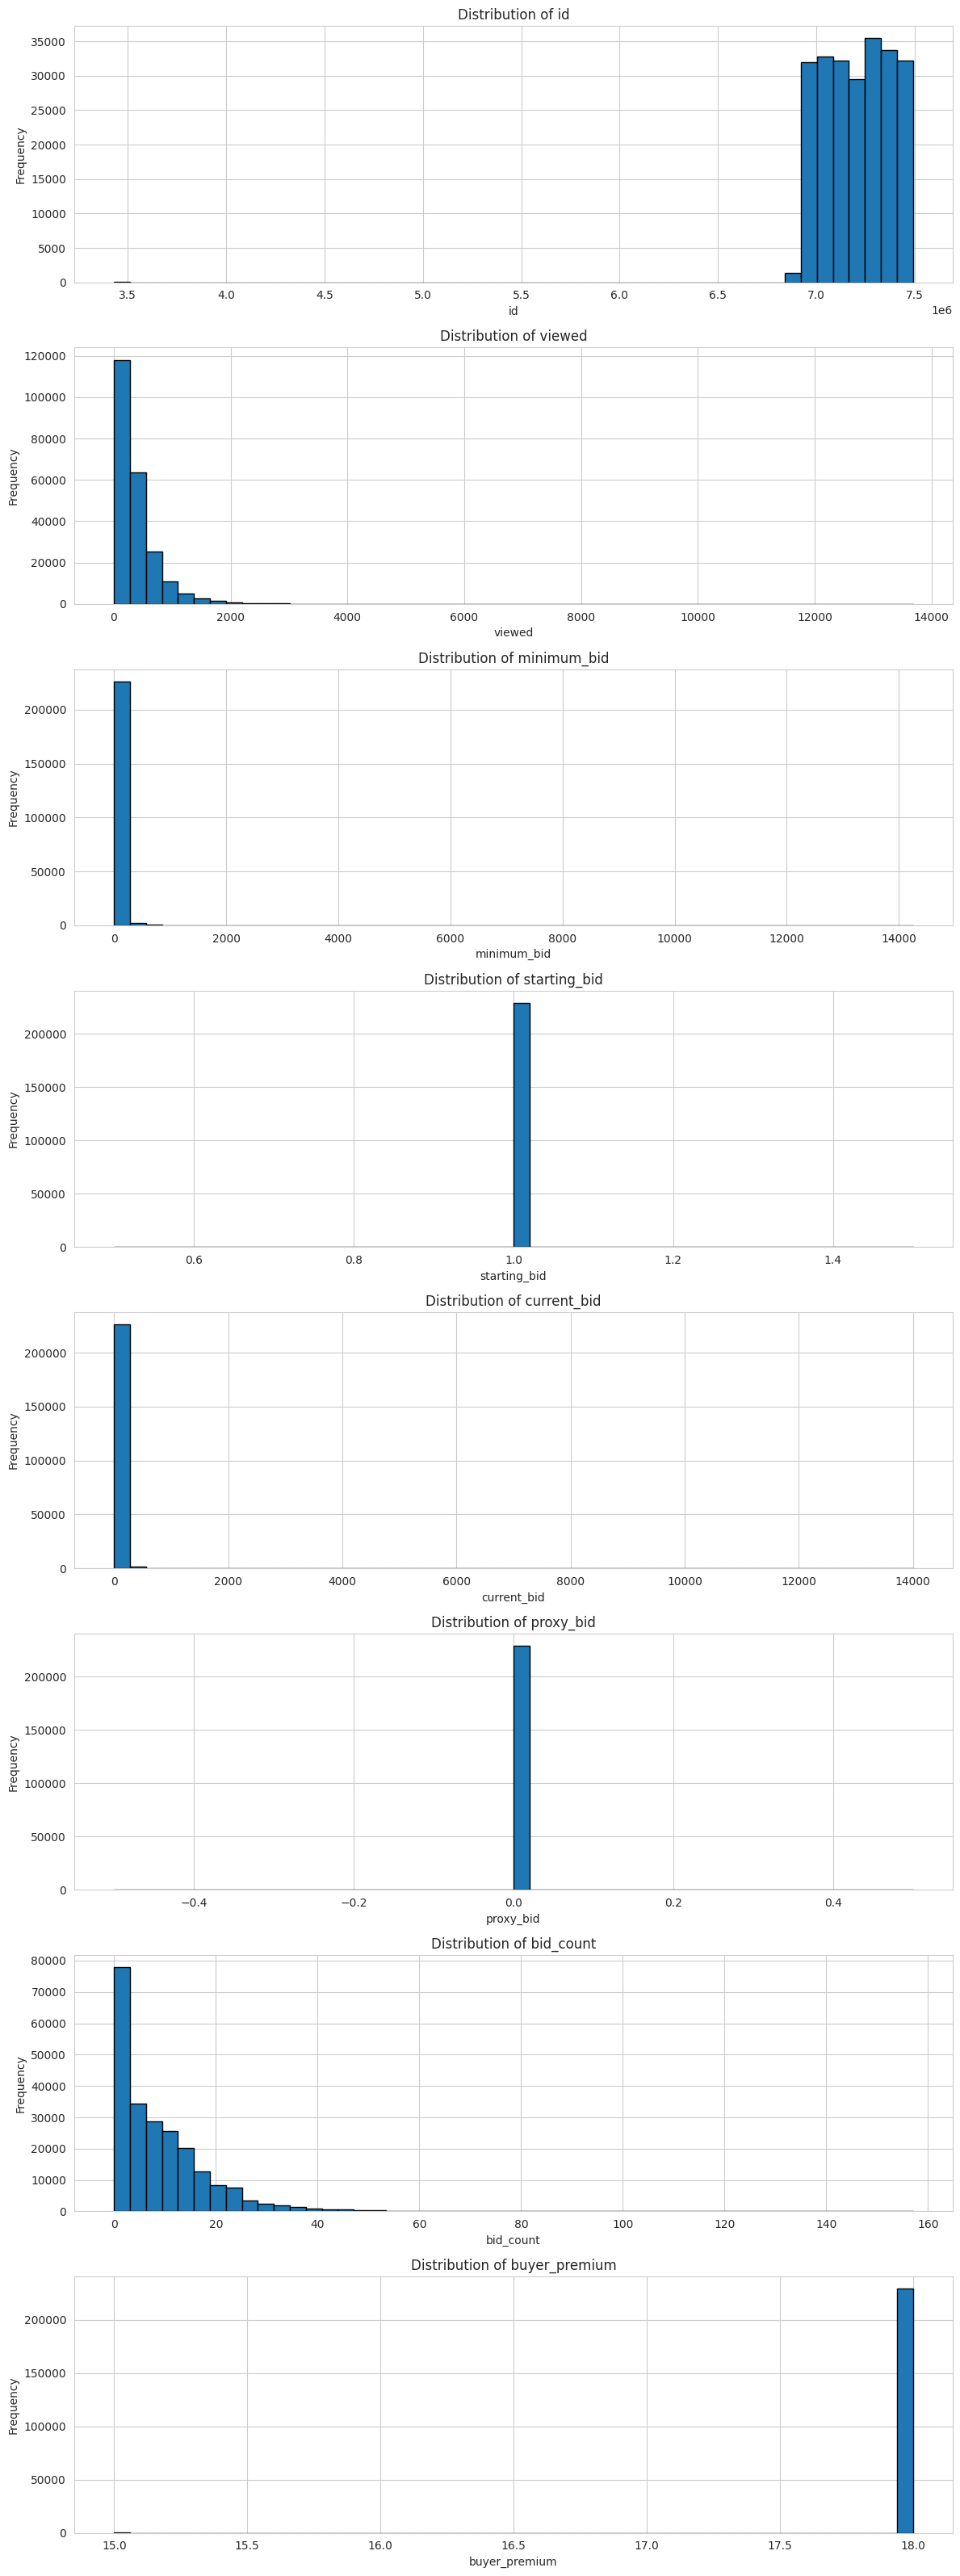

In [6]:
# Plot distribution of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

if len(numeric_cols) > 0:
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 4*len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(numeric_cols):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot")

/tmp/ipykernel_3843/1609226639.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


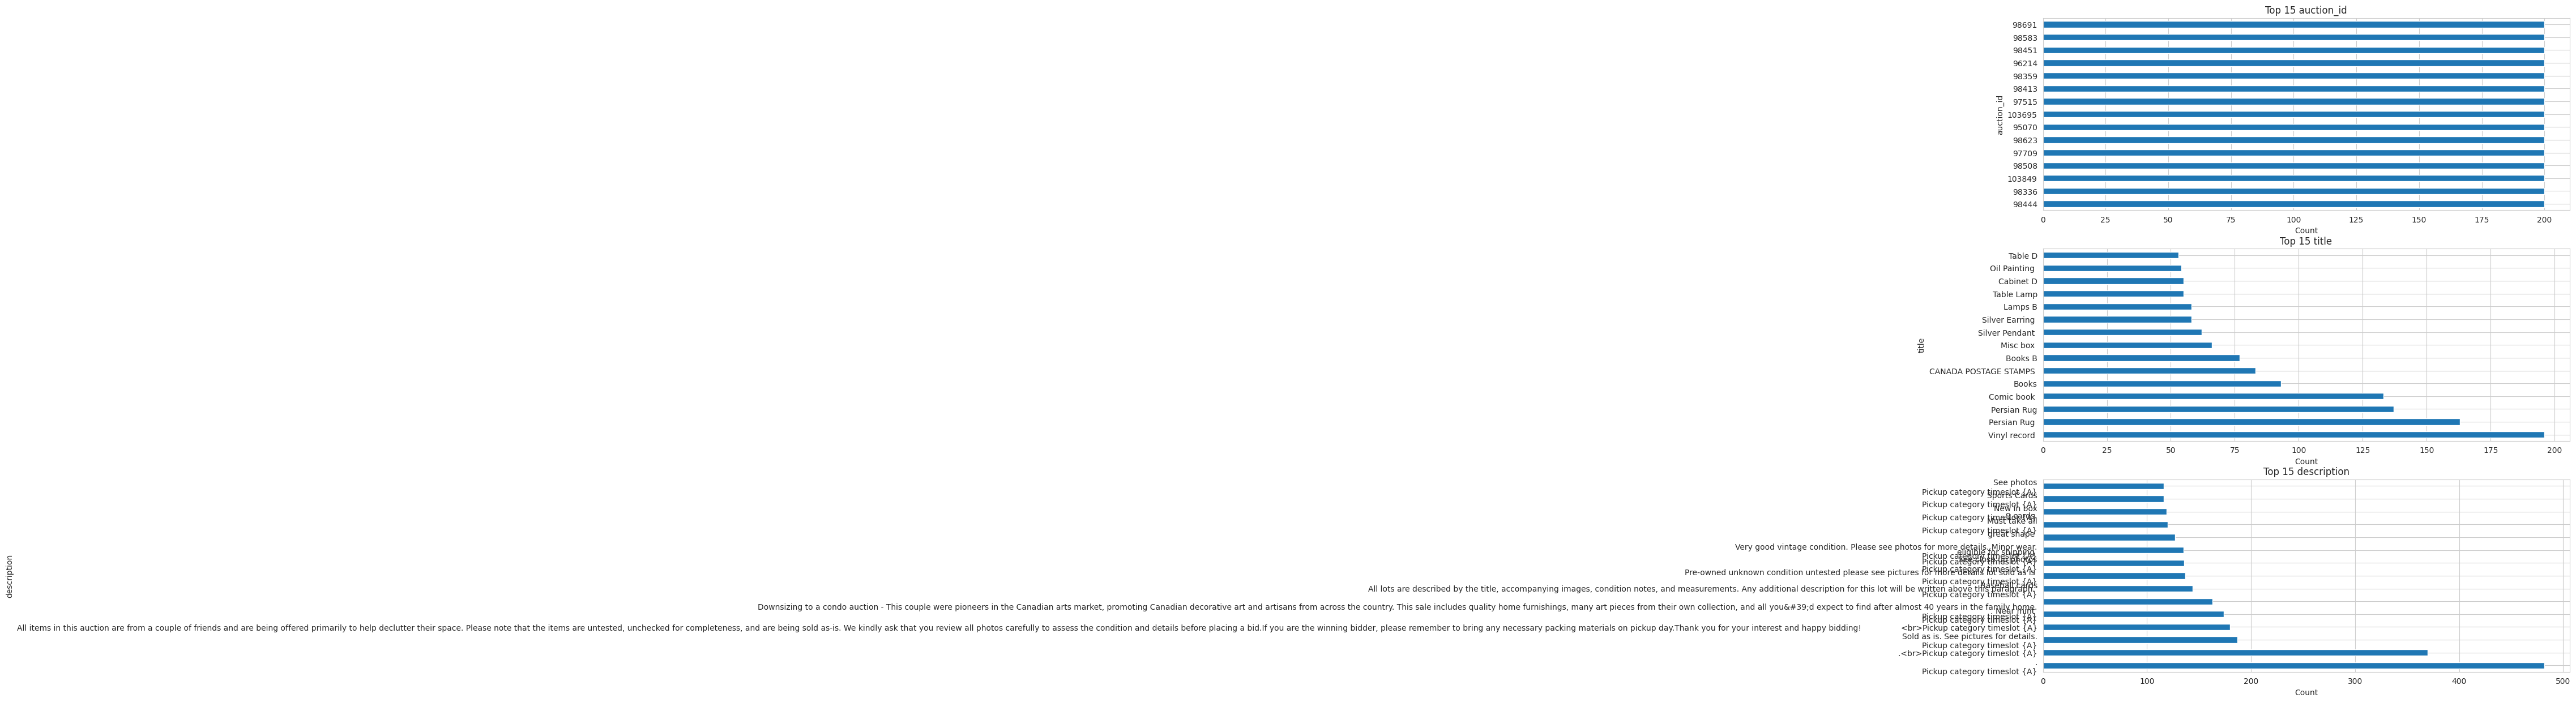

In [7]:
# Plot top categories for categorical columns
if len(categorical_cols) > 0:
    n_plots = min(3, len(categorical_cols))  # Plot up to 3 categorical columns
    fig, axes = plt.subplots(n_plots, 1, figsize=(12, 5*n_plots))
    if n_plots == 1:
        axes = [axes]
    
    for idx, col in enumerate(categorical_cols[:n_plots]):
        top_values = df[col].value_counts().head(15)
        top_values.plot(kind='barh', ax=axes[idx])
        axes[idx].set_title(f'Top 15 {col}')
        axes[idx].set_xlabel('Count')
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns to plot")

## Custom Analysis

Add your custom analysis below:

In [ ]:
# Your custom analysis here
